In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
df = pd.read_csv(url)
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### EDA
###### Load the data.
###### Look at the median_house_value variable. Does it have a long tail?

<Axes: xlabel='median_house_value', ylabel='Count'>

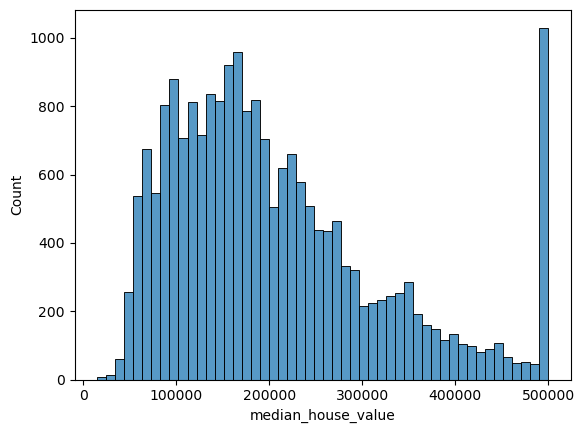

In [4]:
sns.histplot(df['median_house_value'], bins=50)

## Insight: The graph doesn't have a long tail

#### Preparing the dataset
##### For this homework, we only want to use a subset of data.
##### First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

##### Next, use only the following columns:
##### 1. 'latitude',
##### 2. 'longitude',
##### 3. 'housing_median_age',
##### 4. 'total_rooms',
##### 5. 'total_bedrooms',
##### 6. 'population',
##### 7. 'households',
##### 8. 'median_income',
##### 9. 'median_house_value'

In [5]:
#First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'
subset_df = df.loc[df['ocean_proximity'].isin(['<1H OCEAN','INLAND'])]
subset_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
ocean_col = subset_df['ocean_proximity']
ocean_col.head(4)

701    <1H OCEAN
830    <1H OCEAN
859    <1H OCEAN
860    <1H OCEAN
Name: ocean_proximity, dtype: object

In [7]:
#drop the 'ocean_proximity' column
subset_df = subset_df.drop(columns = ['ocean_proximity'],axis=1)
subset_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

### Question 1
##### There's one feature with missing values. What is it?

In [8]:
subset_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

####  total_bedrooms

### Question 2
##### What's the median (50% percentile) for variable 'population'? 

In [9]:
subset_df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,15687.0,-119.217442,1.780380,-124.1400,-121.0700,-118.3700,-117.9900,-114.3100
latitude,15687.0,35.467307,2.066387,32.6100,33.9400,34.1600,37.3400,41.9500
housing_median_age,15687.0,27.188118,12.057128,1.0000,17.0000,27.0000,36.0000,52.0000
total_rooms,15687.0,2665.677312,2257.672743,2.0000,1441.0000,2118.0000,3172.0000,39320.0000
total_bedrooms,15530.0,541.244688,435.650018,2.0000,295.0000,432.0000,645.0000,6445.0000
population,15687.0,1466.317205,1180.389908,3.0000,802.0000,1195.0000,1777.0000,35682.0000
households,15687.0,500.916491,392.759399,2.0000,278.0000,406.0000,602.0000,6082.0000
median_income,15687.0,3.804019,1.857158,0.4999,2.5208,3.4688,4.6862,15.0001
median_house_value,15687.0,191943.020017,108801.077620,14999.0000,111300.0000,166900.0000,241100.0000,500001.0000


In [10]:
subset_df['population'].median()

1195.0

### Question 3
###### We need to deal with missing values for the column from Q1.
###### We have two options: fill it with 0 or with the mean of this variable.
###### Try both options. For each, train a linear regression model without regularization using the code from the lessons.
###### For computing the mean, use the training only!
###### Use the validation dataset to evaluate the models and compare the RMSE of each option.
###### Round the RMSE scores to 2 decimal digits using round(score, 2)
###### Which option gives better RMSE?
###### Options:

###### With 0
###### With mean
###### Both are equally good

##### Prepare and split the dataset

In [11]:
size = len(subset_df)
size

15687

In [12]:
# Shuffle the dataset (the filtered one you created above), use seed 42.
idx = np.arange(size)
np.random.seed(42)
np.random.shuffle(idx)

In [13]:
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [14]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [15]:
val_size = int(size * 0.2) 
test_size = int(size * 0.2)
train_size = size - (val_size + test_size)

size, (val_size + test_size+ train_size)

(15687, 15687)

In [16]:
val_size , test_size , train_size

(3137, 3137, 9413)

In [17]:
train_df = subset_df.iloc[idx[: train_size]]
val_df = subset_df.iloc[idx[train_size : train_size + val_size]]
test_df = subset_df.iloc[idx[train_size + val_size:]]

In [18]:
#reset the index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [19]:
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-117.44,33.90,23.0,4487.0,754.0,2609.0,778.0,4.2788,148700.0
1,-121.65,38.03,28.0,3144.0,694.0,1095.0,482.0,3.4402,192400.0
2,-121.85,37.25,20.0,3773.0,624.0,1965.0,607.0,5.4939,241200.0
3,-116.97,32.78,35.0,1113.0,236.0,681.0,246.0,2.9784,136400.0
4,-121.32,37.97,43.0,2453.0,490.0,1093.0,438.0,2.9107,88800.0
...,...,...,...,...,...,...,...,...,...
3132,-118.14,34.15,41.0,1256.0,407.0,855.0,383.0,1.9923,500001.0
3133,-121.86,37.40,19.0,4043.0,764.0,2196.0,708.0,6.1504,268400.0
3134,-118.15,34.07,52.0,1983.0,344.0,887.0,331.0,3.2875,234400.0
3135,-119.81,36.78,37.0,1965.0,364.0,796.0,335.0,3.6250,83400.0


In [20]:
# Apply the log transformation to the median_house_value variable using the np.log1p() function.
y_train = np.log1p(train_df.median_house_value.values)
y_val = np.log1p(val_df.median_house_value.values)
y_test = np.log1p(test_df.median_house_value.values)

In [21]:
#remove the median_house_value values
del(train_df['median_house_value'])
del(val_df['median_house_value'])
del(test_df['median_house_value'])

In [22]:
len(train_df)

9413

In [23]:
mean_val = train_df['total_bedrooms'].mean()
mean_val

542.552956325786

In [24]:
train_mean_df = train_df.fillna(value= mean_val)

In [25]:
train_mean_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [26]:
train_zero_df = train_df.fillna(0)
train_zero_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [39]:
X_train_zero = np.array(train_zero_df.values)
X_train_zero

array([[-1.1914e+02,  3.6230e+01,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [-1.1779e+02,  3.4120e+01,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [-1.1797e+02,  3.3680e+01,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [-1.1808e+02,  3.4130e+01,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [-1.1846e+02,  3.4290e+01,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [-1.1841e+02,  3.4000e+01,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [27]:
X_train_mean = np.array(train_mean_df.values)
X_train_mean

array([[-1.1914e+02,  3.6230e+01,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [-1.1779e+02,  3.4120e+01,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [-1.1797e+02,  3.3680e+01,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [-1.1808e+02,  3.4130e+01,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [-1.1846e+02,  3.4290e+01,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [-1.1841e+02,  3.4000e+01,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [28]:
def train_linear_regression(X, y):
    
    #define ones and append it to array X
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    #define the GRAM matrix and it's inverse
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [30]:
W0, W = train_linear_regression(X_train_mean, y_train)

In [37]:
#predicted value with missing values filled with mean
y_pred_mean = W0 + X_train_mean.dot(W)

<Axes: ylabel='Count'>

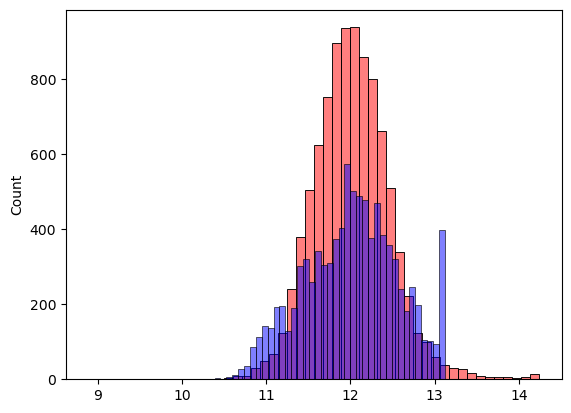

In [38]:
sns.histplot(y_pred_mean, alpha=0.5, bins = 50, color ='red')
sns.histplot(y_train, alpha=0.5, bins = 50, color ='blue')

In [40]:
#predicted value with missing values filled with zero
W0, W = train_linear_regression(X_train_zero, y_train)

In [41]:
y_pred_zero = W0 + X_train_zero.dot(W)

<Axes: ylabel='Count'>

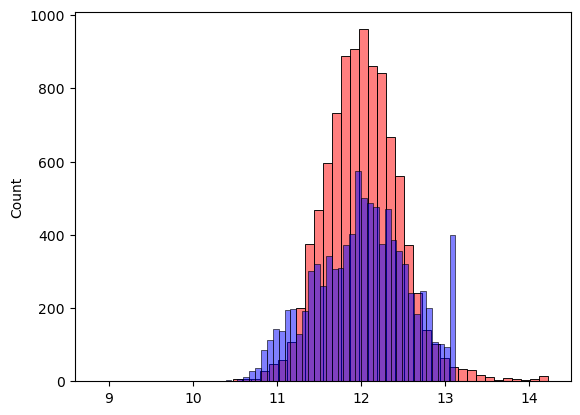

In [42]:
sns.histplot(y_pred_zero, alpha=0.5, bins = 50, color ='red')
sns.histplot(y_train, alpha=0.5, bins = 50, color ='blue')

In [62]:
#data preparation function
def prepare_X_Zero(df):
    df_num = df
    df_num  = df_num.fillna(0)
    X = df_num.values
    
    return X

In [63]:
X_val = prepare_X_Zero(val_df)
y_pred = W0 + X_val.dot(W)

In [61]:
def prepare_X_mean(df):
    df_num = df
    df_num  = df_num.fillna(mean_val)
    X = df_num.values
    
    return X

In [ ]:
X_train = prepare_X_mean(tain_df)
y_pred = W0 + X_train.dot(W)

#### comparing the accuracy of the predictions

In [57]:
def rmse(y_train, y_pred):
    sqr_err = (y_val - y_pred)**2
    mse = sqr_err.mean()
    
    return np.sqrt(mse)

In [58]:
rmse(y_train, y_pred_mean)

ValueError: operands could not be broadcast together with shapes (3137,) (9413,) 

In [59]:
rmse(y_val, y_pred_zero)

ValueError: operands could not be broadcast together with shapes (3137,) (9413,) 